In [9]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
import sys
import tensorflow as tf
import matplotlib.pyplot as plt

label=[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


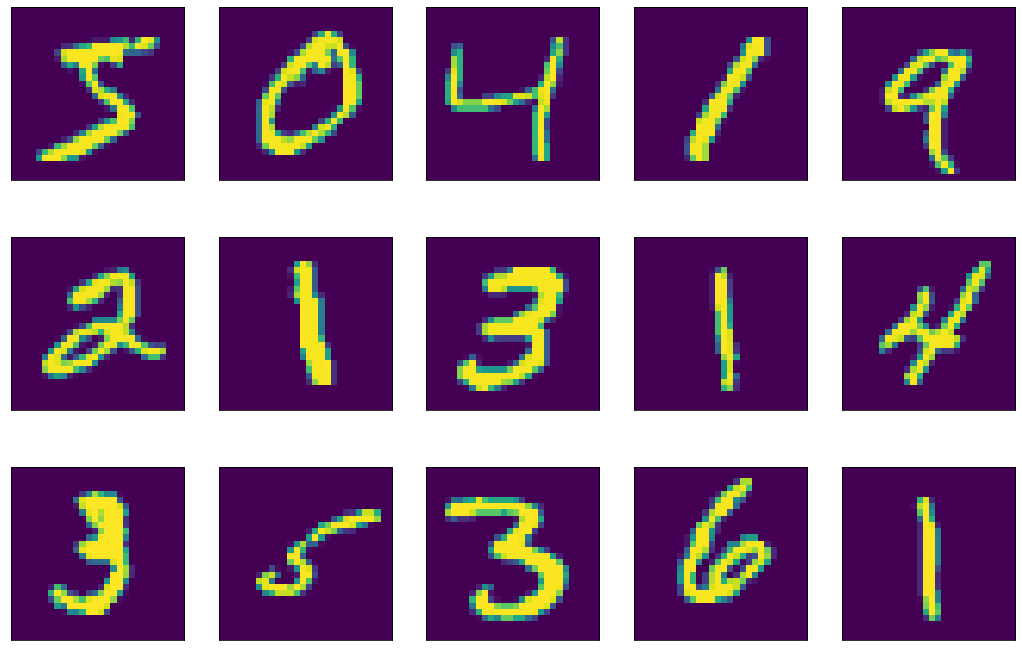

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
fig, axes = plt.subplots(3, 5, figsize=(18,12),
                        subplot_kw= {'xticks':(), 'yticks':() })

print("label={}".format(y_train[0:15]))   # x데이터 0~14개 가져오기

for image, ax in zip( X_train, axes.ravel() ):
    ax.imshow(image) # 이미지 표시

In [8]:
X_train = X_train.reshape(X_train.shape[0],784)   # 60000, 28, 28 -> 60000, 784로 변경
# 데이터 값의 범위 0~255 -> 0~1 
X_train.astype('float64') 
X_train = X_train/255

In [10]:
import numpy as np

print(X_train.shape)               # 데이터 크기
print("데이터의 최대, 최소 :", np.min(X_train), np.max(X_train) )

(60000, 784)
데이터의 최대, 최소 : 0.0 1.0


In [11]:
# 테스트 데이터 전처리
X_test = X_test.reshape(X_test.shape[0],784)
X_test.astype('float64')
X_test = X_test/255

In [12]:
# OneHotEncoding - 10진수의 값을 0, 1의 값을 갖는 벡터로 표현
y_train_1D = np_utils.to_categorical(y_train, 10)
y_test_1D = np_utils.to_categorical(y_test, 10)

In [17]:
y_train[0:4], y_train_1D[0:4]

(array([5, 0, 4, 1], dtype=uint8),
 array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [19]:
m = Sequential()
m.add(Dense(512, input_dim=784, activation='relu'))
m.add(Dense(128, activation='relu'))
m.add(Dense(10, activation='softmax'))

In [20]:
m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = m.fit(X_train, y_train_1D, validation_data=(X_test, y_test_1D), epochs=30, batch_size=200, verbose=1)

Epoch 1/30
300/300 [==============================] - 3s 7ms/step - loss: 0.2701 - accuracy: 0.9217 - val_loss: 0.1318 - val_accuracy: 0.9605
Epoch 2/30
300/300 [==============================] - 2s 7ms/step - loss: 0.0980 - accuracy: 0.9704 - val_loss: 0.0975 - val_accuracy: 0.9692
Epoch 3/30
300/300 [==============================] - 2s 7ms/step - loss: 0.0628 - accuracy: 0.9808 - val_loss: 0.0732 - val_accuracy: 0.9768
Epoch 4/30
300/300 [==============================] - 2s 7ms/step - loss: 0.0443 - accuracy: 0.9860 - val_loss: 0.0745 - val_accuracy: 0.9768
Epoch 5/30
300/300 [==============================] - 2s 8ms/step - loss: 0.0307 - accuracy: 0.9908 - val_loss: 0.0702 - val_accuracy: 0.9795
Epoch 6/30
300/300 [==============================] - 2s 8ms/step - loss: 0.0235 - accuracy: 0.9929 - val_loss: 0.0679 - val_accuracy: 0.9800
Epoch 7/30
300/300 [==============================] - 2s 8ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0658 - val_accuracy: 0.9809
Epoch 

# earlyStopping()

In [23]:
np.random.seed(3)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [24]:
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [26]:
# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 10000)
val_rand_idxs = np.random.choice(10000, 5000)

X_train = X_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

In [27]:
# 라벨링 전환
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [28]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(10000, 784) (10000, 10)
(5000, 784) (5000, 10)
(10000, 784) (10000, 10)


In [30]:
m.compile(loss="categorical_crossentropy",
          optimizer='adam',
          metrics=['accuracy'] ) 

In [32]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [33]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=30, monitor='val_loss')

hiist = m.fit(X_train, y_train, epochs=3000, batch_size=10, 
              validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/3000
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0722 - accuracy: 0.9833 - val_loss: 0.0461 - val_accuracy: 0.9870
Epoch 2/3000
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0370 - accuracy: 0.9892 - val_loss: 0.0392 - val_accuracy: 0.9892
Epoch 3/3000
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0346 - accuracy: 0.9911 - val_loss: 0.1030 - val_accuracy: 0.9746
Epoch 4/3000
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0316 - accuracy: 0.9924 - val_loss: 0.0509 - val_accuracy: 0.9858
Epoch 5/3000
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0306 - accuracy: 0.9921 - val_loss: 0.1321 - val_accuracy: 0.9746
Epoch 6/3000
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0240 - accuracy: 0.9931 - val_loss: 0.1283 - val_accuracy: 0.9736
Epoch 7/3000
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0196 - accuracy: 0.9947 - val_loss: 0.0919 -

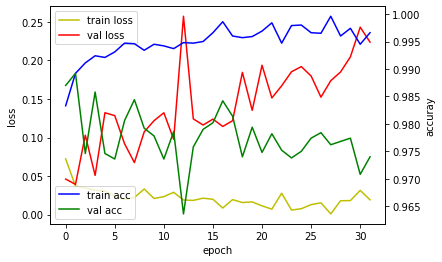

In [35]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hiist.history['loss'], 'y', label='train loss')
loss_ax.plot(hiist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hiist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hiist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()